# Data Loading and EDA

In [1]:
import pandas as pd
import numpy as np
from itertools import product

In [2]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Crop_Production

In [3]:
Crop_Production_df = pd.read_csv("Crop_Production.csv")
Crop_Production_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 
                         'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Crop_Production_df = Crop_Production_df[Crop_Production_df['Year'].between(2000, 2021)]
Crop_Production_df.rename(columns={'Element': 'Prod_type', 'Item': 'Crop_Name', 'Value': 'Crop_Production_Value', 
                                   'Unit': 'Crop_Production_Unit'}, inplace=True)

Crop_Production_df.head()

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value
0,Brazil,Area harvested,Maize (corn),2000,ha,11890376.0
1,Brazil,Yield,Maize (corn),2000,100 g/ha,27182.0
2,Brazil,Production,Maize (corn),2000,t,32321000.0
3,Brazil,Area harvested,Maize (corn),2001,ha,12335175.0
4,Brazil,Yield,Maize (corn),2001,100 g/ha,34019.0


In [4]:
Crop_Production_df.shape

(990, 6)

In [5]:
unique_values = Crop_Production_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [6]:
null_values_count = Crop_Production_df.isnull().sum()
print(null_values_count)

Area                     0
Prod_type                0
Crop_Name                0
Year                     0
Crop_Production_Unit     0
Crop_Production_Value    0
dtype: int64


Text(0.5, 1.0, 'Crop Production Size by Crop')

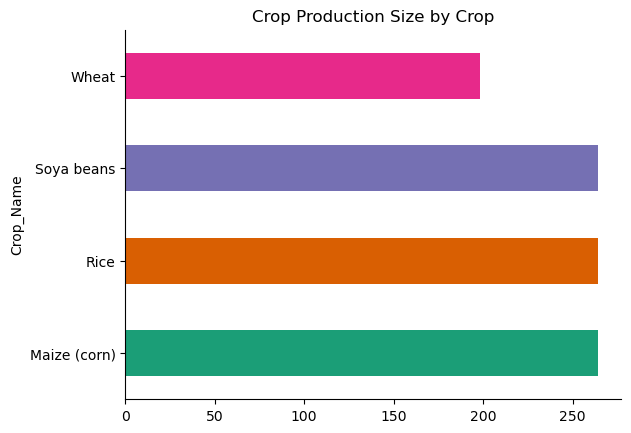

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
Crop_Production_df.groupby('Crop_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Crop Production Size by Crop")

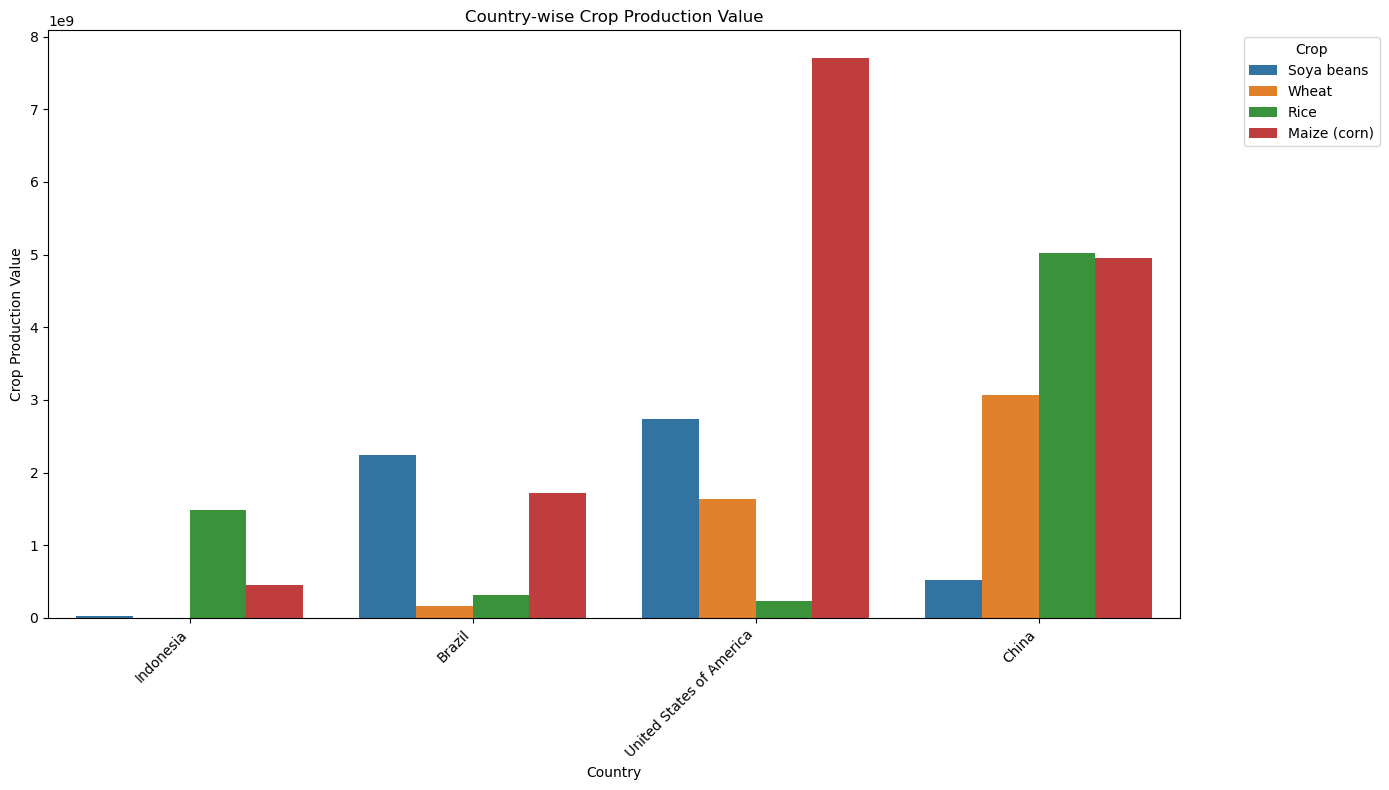

In [8]:
# Grouping by 'Area' (country) and 'Crop_Name', and summing up the 'Crop_Production_Value' for each country and crop
country_crop_production = Crop_Production_df.groupby(['Area', 'Crop_Name'])['Crop_Production_Value'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(data=country_crop_production.sort_values(by='Crop_Production_Value', ascending=True), x='Area', y='Crop_Production_Value', hue='Crop_Name')
plt.title('Country-wise Crop Production Value')
plt.xlabel('Country')
plt.ylabel('Crop Production Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

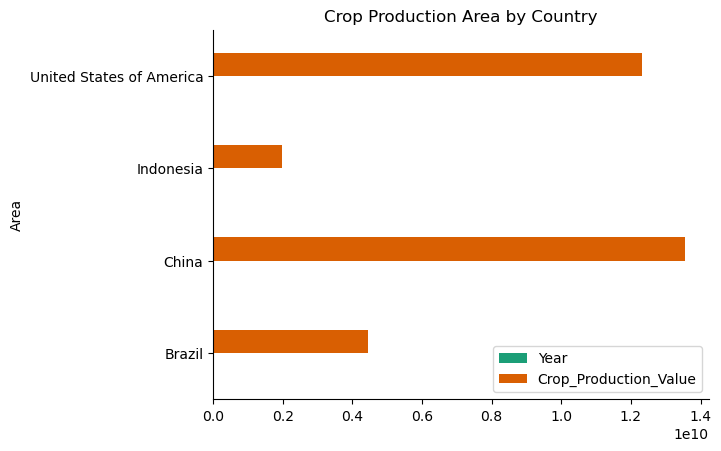

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group by 'Area' and get the size of each group, then plot as horizontal bar chart
Crop_Production_df.groupby('Area').sum().plot(kind='barh', color=sns.color_palette('Dark2'))

# Hide the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Crop Production Area by Country")
# Show the plot
plt.show()

## Crop_Trade

In [10]:
Crop_Trade_df = pd.read_csv("Crop_Trade.csv")
Crop_Trade_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 
                         'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Crop_Trade_df = Crop_Trade_df[Crop_Trade_df['Year'].between(2000, 2021)]
Crop_Trade_df.rename(columns={'Element': 'Trade_type', 'Item': 'Crop_Name', 'Value': 'Trade_Value',  'Unit': 'Trade_Unit'}, inplace=True)

Crop_Trade_df.head()

,Area,Trade_type,Crop_Name,Year,Trade_Unit,Trade_Value
0,Brazil,Import Quantity,Maize (corn),2000,t,1771194.0
1,Brazil,Import Value,Maize (corn),2000,1000 USD,201960.0
2,Brazil,Export Quantity,Maize (corn),2000,t,6699.0
3,Brazil,Export Value,Maize (corn),2000,1000 USD,9366.0
4,Brazil,Import Quantity,Maize (corn),2001,t,624362.0


In [11]:
Crop_Trade_df.shape

(1404, 6)

In [12]:
unique_values = Crop_Trade_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [13]:
null_values_count = Crop_Trade_df.isnull().sum()
print(null_values_count)

Area           0
Trade_type     0
Crop_Name      0
Year           0
Trade_Unit     0
Trade_Value    0
dtype: int64


## Emission_from_Crops

In [14]:
Emission_from_Crops_df = pd.read_csv("Emission_from_Crops.csv")
Emission_from_Crops_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Source', 'Source Code',
                    'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Emission_from_Crops_df.rename(columns={'Element': 'Emission_type', 'Item': 'Crop_Name', 'Value': 'Emission_Value',  'Unit': 'Emission_Unit'}, inplace=True)

Emission_from_Crops_df.head()

,Area,Emission_type,Crop_Name,Year,Emission_Unit,Emission_Value
0,Brazil,Crops total (Emissions N2O),Maize (corn),2000,kt,6.4353
1,Brazil,Crops total (Emissions CH4),Maize (corn),2000,kt,32.1040
2,Brazil,Crops total (Emissions N2O),Maize (corn),2001,kt,7.8851
3,Brazil,Crops total (Emissions CH4),Maize (corn),2001,kt,33.3050
4,Brazil,Crops total (Emissions N2O),Maize (corn),2002,kt,6.9347


In [15]:
Emission_from_Crops_df.shape

(572, 6)

In [16]:
unique_values = Emission_from_Crops_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [17]:
null_values_count = Emission_from_Crops_df.isnull().sum()
print(null_values_count)

Area              0
Emission_type     0
Crop_Name         0
Year              0
Emission_Unit     0
Emission_Value    0
dtype: int64


## Land_Use

In [18]:
Land_Use_df = pd.read_csv("Land_Use.csv")
Land_Use_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element',
                    'Item Code', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Land_Use_df.rename(columns={'Item': 'Area_type', 'Value': 'Area_Value',  'Unit': 'Area_Unit'}, inplace=True)

Land_Use_df.head()

,Area,Area_type,Year,Area_Unit,Area_Value
0,Brazil,Land area,2000,1000 ha,835814.0
1,Brazil,Land area,2001,1000 ha,835814.0
2,Brazil,Land area,2002,1000 ha,835814.0
3,Brazil,Land area,2003,1000 ha,835814.0
4,Brazil,Land area,2004,1000 ha,835814.0


In [19]:
Land_Use_df.shape

(176, 5)

In [20]:
unique_values = Land_Use_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [21]:
null_values_count = Land_Use_df.isnull().sum()
print(null_values_count)

Area          0
Area_type     0
Year          0
Area_Unit     0
Area_Value    0
dtype: int64


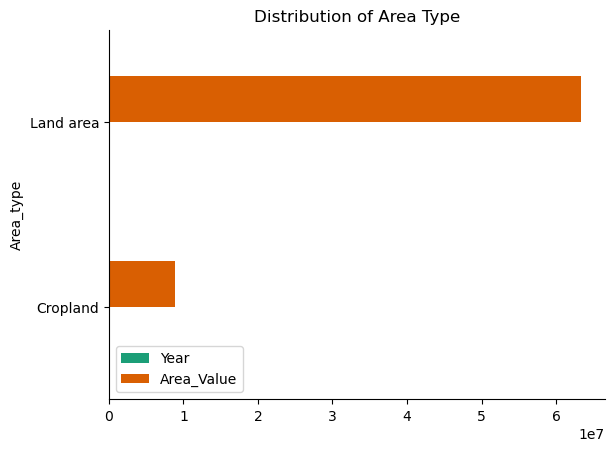

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
Land_Use_df.groupby('Area_type').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Distribution of Area Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Pesticides_Use

In [23]:
Pesticides_Use_df = pd.read_csv("Pesticides_Use.csv")
Pesticides_Use_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element',
                    'Item Code', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Pesticides_Use_df.rename(columns={'Item': 'Pesticide_Type', 'Value': 'Pesticide_Value',  'Unit': 'Pesticide_Unit'}, inplace=True)

Pesticides_Use_df.head()

,Area,Pesticide_Type,Year,Pesticide_Unit,Pesticide_Value
0,Brazil,Pesticides (total),2000,t,141130.0
1,Brazil,Pesticides (total),2001,t,152271.0
2,Brazil,Pesticides (total),2002,t,146264.0
3,Brazil,Pesticides (total),2003,t,183340.0
4,Brazil,Pesticides (total),2004,t,215779.0


In [24]:
Pesticides_Use_df.shape

(264, 5)

In [25]:
unique_values = Pesticides_Use_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [26]:
null_values_count = Pesticides_Use_df.isnull().sum()
print(null_values_count)

Area               0
Pesticide_Type     0
Year               0
Pesticide_Unit     0
Pesticide_Value    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

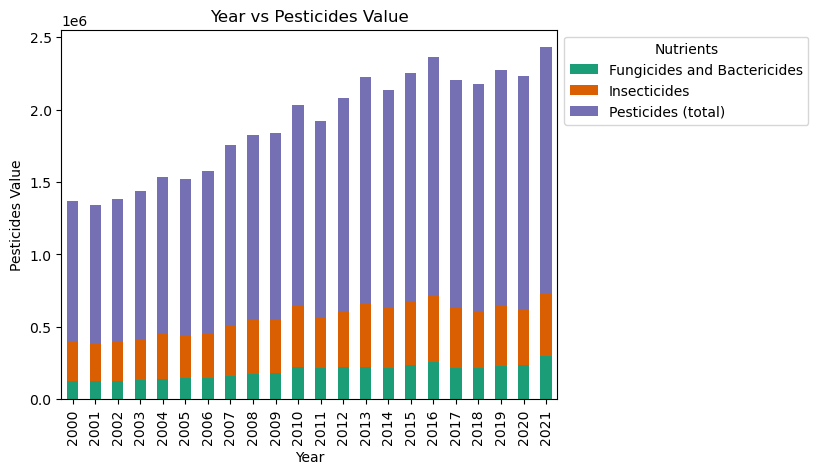

In [27]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Grouping the data by year and nutrients and summing the values
df_grouped = Pesticides_Use_df.groupby(['Year', 'Pesticide_Type'])['Pesticide_Value'].sum().unstack()

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
sns.set_palette("Dark2")
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Pesticides Value')
plt.title('Year vs Pesticides Value')
plt.legend(title='Nutrients', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

<Figure size 1000x600 with 0 Axes>

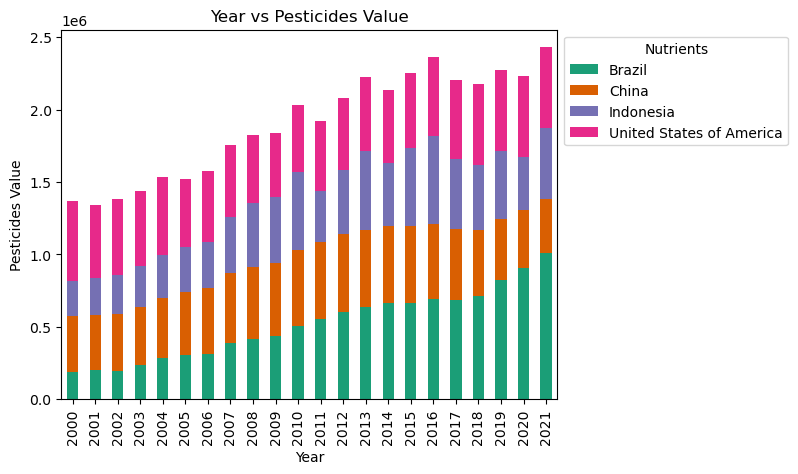

In [28]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Grouping the data by year and nutrients and summing the values
df_grouped = Pesticides_Use_df.groupby(['Year', 'Area'])['Pesticide_Value'].sum().unstack()

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
sns.set_palette("Dark2")
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Pesticides Value')
plt.title('Year vs Pesticides Value')
plt.legend(title='Nutrients', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## Value_of_Agricultural_production

In [29]:
Value_of_Agricultural_production_df = pd.read_csv("Value_of_Agricultural_production.csv")
Value_of_Agricultural_production_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 
                         'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description'], axis=1,inplace=True)
Value_of_Agricultural_production_df = Value_of_Agricultural_production_df[Value_of_Agricultural_production_df['Year'].between(2000, 2021)]
Value_of_Agricultural_production_df.rename(columns={'Item': 'Crop_Name', 'Value': 'Agri_Prod_Value',  'Unit': 'Agri_Prod_Unit'}, inplace=True)
Value_of_Agricultural_production_df.head()

,Area,Element,Crop_Name,Year,Agri_Prod_Unit,Agri_Prod_Value
0,Brazil,Gross Production Value (current thousand US$),Maize (corn),2000,1000 USD,3568843
1,Brazil,Gross Production Value (current thousand US$),Maize (corn),2001,1000 USD,2911084
2,Brazil,Gross Production Value (current thousand US$),Maize (corn),2002,1000 USD,3209618
3,Brazil,Gross Production Value (current thousand US$),Maize (corn),2003,1000 USD,4973278
4,Brazil,Gross Production Value (current thousand US$),Maize (corn),2004,1000 USD,4321472


In [30]:
Value_of_Agricultural_production_df.shape

(317, 6)

In [31]:
unique_values = Value_of_Agricultural_production_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2018 2019 2020 2021 2017]


In [32]:
null_values_count = Value_of_Agricultural_production_df.isnull().sum()
print(null_values_count)

Area               0
Element            0
Crop_Name          0
Year               0
Agri_Prod_Unit     0
Agri_Prod_Value    0
dtype: int64


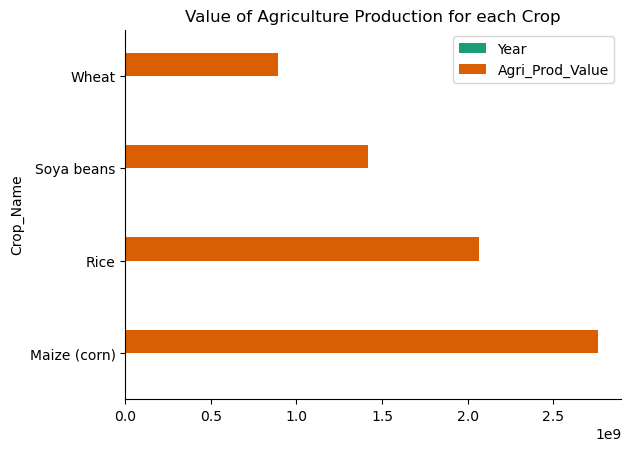

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
Value_of_Agricultural_production_df.groupby('Crop_Name').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Value of Agriculture Production for each Crop')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Merging the Data

In [34]:
merged_df = pd.merge(Crop_Production_df, Crop_Trade_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Emission_from_Crops_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Value_of_Agricultural_production_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df, Land_Use_df, on=['Area', 'Year'], how='inner')
merged_df = pd.merge(merged_df,Pesticides_Use_df, on=['Area', 'Year'], how='inner')

In [35]:
merged_df.head(2)

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value,Trade_type,Trade_Unit,Trade_Value,Emission_type,...,Emission_Value,Element,Agri_Prod_Unit,Agri_Prod_Value,Area_type,Area_Unit,Area_Value,Pesticide_Type,Pesticide_Unit,Pesticide_Value
0,Brazil,Area harvested,Maize (corn),2000,ha,11890376.0,Import Quantity,t,1771194.0,Crops total (Emissions N2O),...,6.4353,Gross Production Value (current thousand US$),1000 USD,3568843,Land area,1000 ha,835814.0,Pesticides (total),t,141130.0
1,Brazil,Area harvested,Maize (corn),2000,ha,11890376.0,Import Quantity,t,1771194.0,Crops total (Emissions N2O),...,6.4353,Gross Production Value (current thousand US$),1000 USD,3568843,Land area,1000 ha,835814.0,Insecticides,t,28382.0


In [36]:
merged_df.shape

(39384, 21)

In [37]:
print(merged_df)

                           Area       Prod_type     Crop_Name  Year  \
0                        Brazil  Area harvested  Maize (corn)  2000   
1                        Brazil  Area harvested  Maize (corn)  2000   
2                        Brazil  Area harvested  Maize (corn)  2000   
3                        Brazil  Area harvested  Maize (corn)  2000   
4                        Brazil  Area harvested  Maize (corn)  2000   
...                         ...             ...           ...   ...   
39379  United States of America      Production         Wheat  2021   
39380  United States of America      Production         Wheat  2021   
39381  United States of America      Production         Wheat  2021   
39382  United States of America      Production         Wheat  2021   
39383  United States of America      Production         Wheat  2021   

      Crop_Production_Unit  Crop_Production_Value       Trade_type Trade_Unit  \
0                       ha             11890376.0  Import Quantity

In [38]:
merged_df.columns

Index(['Area', 'Prod_type', 'Crop_Name', 'Year', 'Crop_Production_Unit',
       'Crop_Production_Value', 'Trade_type', 'Trade_Unit', 'Trade_Value',
       'Emission_type', 'Emission_Unit', 'Emission_Value', 'Element',
       'Agri_Prod_Unit', 'Agri_Prod_Value', 'Area_type', 'Area_Unit',
       'Area_Value', 'Pesticide_Type', 'Pesticide_Unit', 'Pesticide_Value'],
      dtype='object')

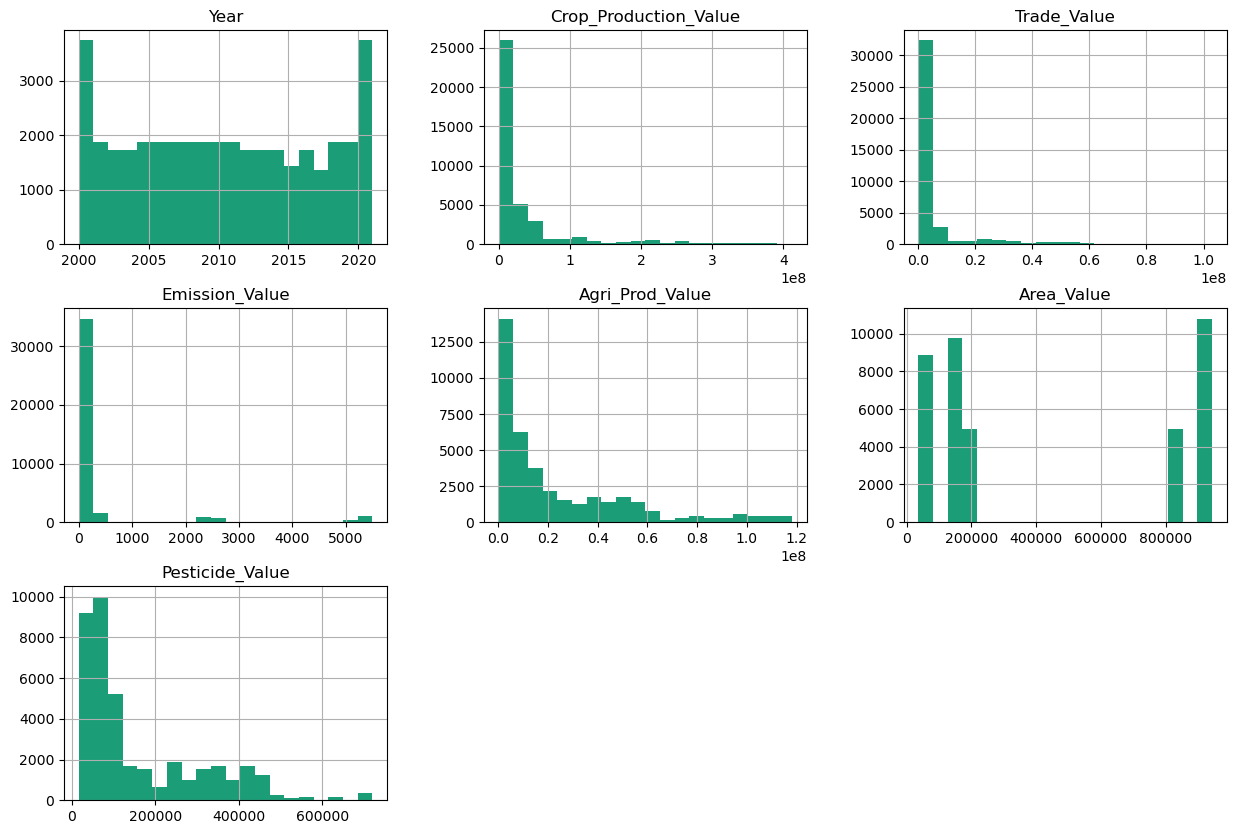

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Year', 'Crop_Production_Value', 'Trade_Value', 'Emission_Value', 'Element', 'Agri_Prod_Value', 'Area_type', 'Area_Value','Pesticide_Value']
merged_df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.show()

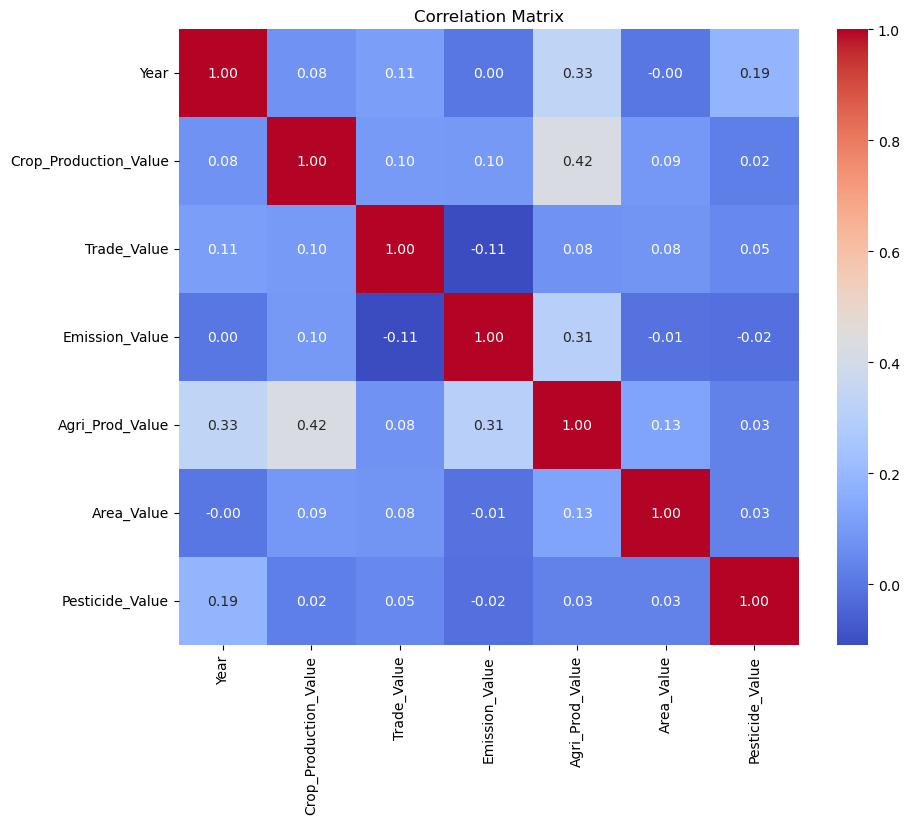

In [40]:
# Correlation matrix
correlation_matrix = merged_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


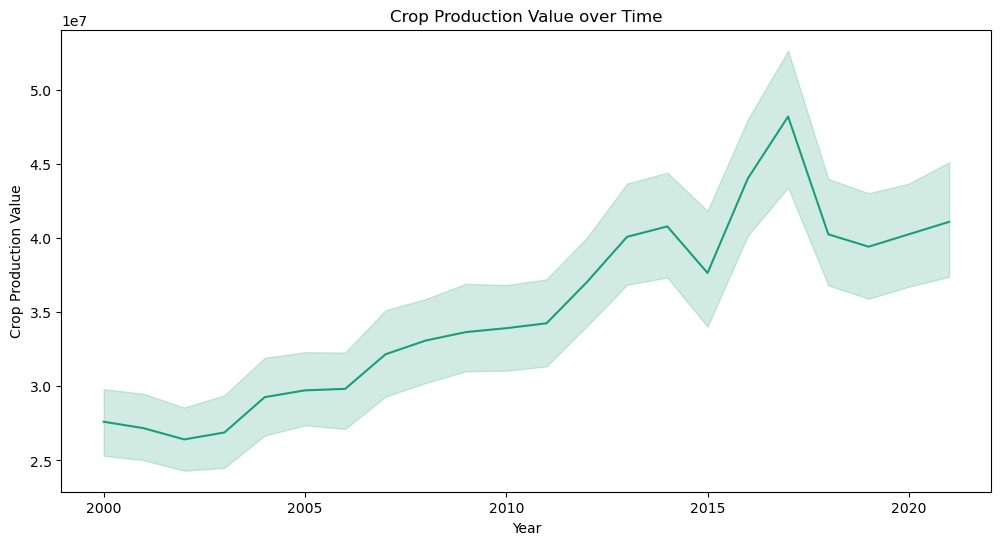

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Year', y='Crop_Production_Value')
plt.xlabel('Year')
plt.ylabel('Crop Production Value')
plt.title('Crop Production Value over Time')
plt.show()

## Model Building

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
!pip install xgboost

In [43]:
feature_cols = ['Area', 'Prod_type', 'Crop_Name', 'Year', 'Emission_type', 'Area_type', 'Pesticide_Type', 'Pesticide_Value', 'Area_Value']
target_col = 'Crop_Production_Value'

In [44]:
# Splitting the dataset into training and test sets
# Filtering the dataset for training and testing
train_data = merged_df[merged_df['Year'] <= 2018]
test_data = merged_df[merged_df['Year'] > 2018]

In [45]:
X_train = train_data[feature_cols]
y_train = train_data[target_col]
X_test = test_data[feature_cols]
y_test = test_data[target_col]

In [46]:
# Creating a preprocessing pipeline for the numerical features
numerical_cols = ['Year', 'Area_Value', 'Pesticide_Value']  
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [47]:
# Creating a preprocessing pipeline for the categorical features
categorical_cols = ['Area', 'Prod_type', 'Crop_Name', 'Emission_type', 'Area_type', 'Pesticide_Type']  
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [48]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Random Forest

In [49]:
# Create a Random Forest model
rf = RandomForestRegressor(random_state=42)

In [50]:
# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', rf)])

In [51]:
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 10, 20],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [52]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [53]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Year',
                                                                          'Area_Value',
                                                                          'Pesticide_Value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'Prod_type',
                                                                          'Crop_Name',
                                                                          'Emission_type',
                                                                          'Area_type',
                                                                          'Pesticide_Type'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 10, 20],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [54]:
# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)

Best parameters found:  {'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best score found:  3280442735555310.5


In [55]:
# Using the best parameters to create a new model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, 
                                         max_depth=None, 
                                         min_samples_split=2,  # Updated parameter
                                         min_samples_leaf=4,
                                         random_state=42))
])

In [56]:
# Training the model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Area_Value',
                                                   'Pesticide_Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'Prod_type',
                                                   'Crop_Name', 'Emission_type',
                                                   'Area_type',
                                                   'Pesticide_Type'])])),
                ('regressor',
                 RandomForestRegressor(min_samples_leaf=4, random_state=42))])

In [70]:
# Making predictions and evaluating the model
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculating RMSE

# Calculating the mean of the actual values
mean_actual = np.mean(y_test)

# Calculating NRMSE in percentage
rf_nrmse_percent = (rmse / mean_actual) * 100

print(f"Normalized Root Mean Squared Error (Percentage): {rf_nrmse_percent:.2f}%")

Normalized Root Mean Squared Error (Percentage): 12.62%


In [61]:
print(y_pred)

[16126368. 16126368. 16126368. ... 51305540. 51305540. 51305540.]


In [62]:
# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
rf_mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {rf_mape:.2f}%")

Mean Absolute Error (MAE): 2271026.91
Mean Absolute Percentage Error (MAPE): 16.09%


## Xgboost

In [65]:
import xgboost as xgb

In [66]:
# Create a pipeline with XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

In [67]:
# Training the model
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Area_Value',
                                                   'Pesticide_Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'Prod_type',
                                                   'Crop_Name', 'Emission_type',
                                                   'Area_type',
                                                   'Pesticide_Type'])])),
                ('regressor',
                 XGBRegressor(base_scor...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [68]:
# Making predictions
y_pred_xgb = xgb_pipeline.predict(X_test)

In [72]:
# Calculating RMSE for the test set
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")

# Calculating NRMSE in percentage
xgb_nrmse_percent = (rmse_xgb / mean_actual) * 100

print(f"Normalized Root Mean Squared Error (Percentage): {xgb_nrmse_percent:.2f}%")

XGBoost RMSE: 5537881.069899041
Normalized Root Mean Squared Error (Percentage): 13.76%


In [74]:
# Calculating Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")

# Calculating Mean Absolute Percentage Error (MAPE)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"XGBoost MAPE: {mape_xgb:.2f}%")

XGBoost MAE: 2734222.684564498
XGBoost MAPE: 367.43%


## Future Predictions

In [75]:
countries = ['Brazil', 'Indonesia', 'China', 'United States of America']
crops = ['Maize (corn)', 'Soya beans', 'Wheat', 'Rice']
years = [2022, 2023, 2024]
prod_types = ['Area harvested', 'Yield']
emission_types = ['Crops total (Emissions N2O)', 'Crops total (Emissions CH4)']
area_types = ['Land area', 'Cropland']
pesticide_types = ['Pesticides (total)', 'Insecticides', 'Fungicides and Bactericides']

In [99]:
# Define crop production units as a dictionary
crop_production_units = {
    'Area harvested': 'ha',
    'Yield': '100 g/ha'
}

In [101]:
# Generate all possible combinations of factors
combinations = list(product(countries, crops, years, prod_types, 
                            emission_types, area_types, pesticide_types))

In [102]:
# Initialize an empty list to store the data
pred_data = []

In [105]:
# Iterate over each combination and generate the corresponding row of data
for combination in combinations[:96]:
    country, crop, year, prod_type, emission_type, area_type, pesticide_type = combination
    
    # Determine crop production unit based on prod_type
    crop_production_unit = crop_production_units.get(prod_type)
    
    row = {
        'Area': country,
        'Prod_type': prod_type,
        'Crop_Name': crop,
        'Year': year,
        'Crop_Production_Unit': crop_production_unit,
        'Emission_type': emission_type,
        'Area_type': area_type,
        'Pesticide_Type': pesticide_type,
        'Area_Value': np.random.choice(merged_df[merged_df['Area'] == country]['Area_Value'], size=1)[0],# Sample area value from original dataset
        'Pesticide_Value': np.random.choice(merged_df[merged_df['Pesticide_Type'] == pesticide_type]['Pesticide_Value'], size=1)[0]
    }
    pred_data.append(row)


In [106]:
# Create a DataFrame from the collected data
pred_data_df = pd.DataFrame(pred_data)

In [107]:
pred_data_df.shape

(96, 10)

In [108]:
# Make predictions using the trained model
X_pred_future = pred_data_df[feature_cols]

In [109]:
y_pred_future = rf_model.predict(X_pred_future)

In [110]:
pred_data_df['Crop_Production_Value'] = y_pred_future

In [111]:
pred_data_df.head()

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Emission_type,Area_type,Pesticide_Type,Area_Value,Pesticide_Value,Crop_Production_Value
0,Brazil,Area harvested,Maize (corn),2022,ha,Crops total (Emissions N2O),Land area,Pesticides (total),64763.69,457385.42,16126368.0
1,Brazil,Area harvested,Maize (corn),2022,ha,Crops total (Emissions N2O),Land area,Insecticides,835814.00,67528.01,16126368.0
2,Brazil,Area harvested,Maize (corn),2022,ha,Crops total (Emissions N2O),Land area,Fungicides and Bactericides,58682.00,19504.46,16126368.0
3,Brazil,Area harvested,Maize (corn),2022,ha,Crops total (Emissions N2O),Cropland,Pesticides (total),835814.00,374818.20,16126368.0
4,Brazil,Area harvested,Maize (corn),2022,ha,Crops total (Emissions N2O),Cropland,Insecticides,835814.00,29208.00,16126368.0


array(['Brazil'], dtype=object)